# Computer Vision Lab

The target of this part is to compare CNN with an MLP.


## Package and dependency

In [52]:
# General stuff
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.metrics import confusion_matrix , classification_report


from collections import namedtuple as nt

In [53]:
# MLP implementation
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten, Dropout, Conv2D, MaxPooling2D, GlobalAveragePooling2D, Input
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint
from keras.datasets import cifar10
from keras.models import Model


## Enabling the GPU
First, you'll need to enable GPUs for the notebook:

- Navigate to Edit→Notebook Settings
- select GPU from the Hardware Accelerator drop-down

Next, we'll confirm that we can connect to the GPU with tensorflow:

In [54]:
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Load data

In [55]:
# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

## Visualize data

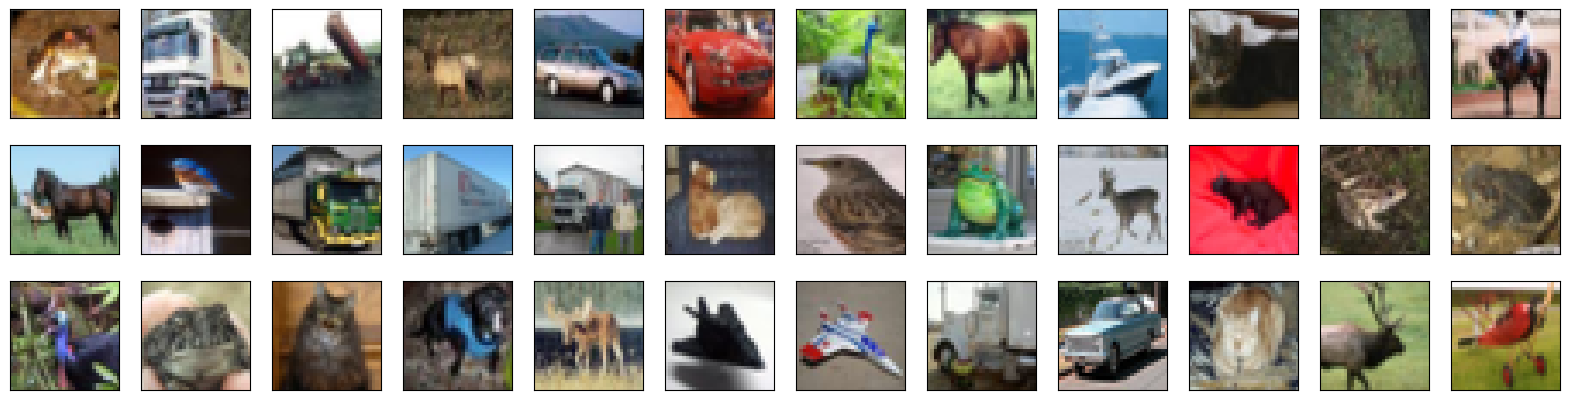

In [56]:
images_to_show = 36
per_row = 12
fig = plt.figure(figsize=(20,5))

for i in range(images_to_show):
    pos = (i // per_row, ((i % per_row) + per_row) % per_row)
    ax = plt.subplot2grid((int(images_to_show / per_row), per_row),
                          pos, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_train[i]))

plt.show()

## Preprocess data

In [57]:

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

## Model

In [58]:
def build_mlp():
    # Create model architecture
    model = Sequential([
        Flatten(input_shape=(32, 32, 3)),
        Dense(units=1024, activation="relu"),
        Dropout(0.1),
        Dense(units=512, activation="relu"),
        Dropout(0.1),
        Dense(units=256, activation="relu"),
        Dropout(0.1),
        Dense(units=10, activation="softmax")
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

### Compile the model
We use two function relu and sigmoid to try different function.
We also use different optimizer to show the difference.

In [59]:
# Compile the model
model = build_mlp()

In [60]:
print("MLP architecture:")
model.summary()

MLP architecture:
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 3072)              0         
                                                                 
 dense_10 (Dense)            (None, 1024)              3146752   
                                                                 
 dropout_8 (Dropout)         (None, 1024)              0         
                                                                 
 dense_11 (Dense)            (None, 512)               524800    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_12 (Dense)            (None, 256)               131328    
                                                                 
 dropout_10 (Dropout)        (None, 

## Train model

In [61]:
mlp_weights_path = "saved_weights/cifar10_mlp.hdf5"

In [62]:
# Train the mlp
checkpointer_mlp = ModelCheckpoint(filepath=mlp_weights_path, verbose=1, save_best_only=True)
hist_mlp = model.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.1, callbacks=[checkpointer_mlp], shuffle=True)

Epoch 1/30
696/704 [============================>.] - ETA: 0s - loss: 1.9019 - accuracy: 0.3110
Epoch 1: val_loss improved from inf to 1.75645, saving model to saved_weights/cifar10_mlp.hdf5
704/704 [==============================] - 6s 6ms/step - loss: 1.9002 - accuracy: 0.3111 - val_loss: 1.7565 - val_accuracy: 0.3614
Epoch 2/30
 10/704 [..............................] - ETA: 3s - loss: 1.7443 - accuracy: 0.4016

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


693/704 [============================>.] - ETA: 0s - loss: 1.7072 - accuracy: 0.3884
Epoch 2: val_loss improved from 1.75645 to 1.68112, saving model to saved_weights/cifar10_mlp.hdf5
704/704 [==============================] - 4s 5ms/step - loss: 1.7067 - accuracy: 0.3887 - val_loss: 1.6811 - val_accuracy: 0.4090
Epoch 3/30
695/704 [============================>.] - ETA: 0s - loss: 1.6326 - accuracy: 0.4164
Epoch 3: val_loss improved from 1.68112 to 1.59247, saving model to saved_weights/cifar10_mlp.hdf5
704/704 [==============================] - 4s 5ms/step - loss: 1.6321 - accuracy: 0.4167 - val_loss: 1.5925 - val_accuracy: 0.4324
Epoch 4/30
697/704 [============================>.] - ETA: 0s - loss: 1.5722 - accuracy: 0.4386
Epoch 4: val_loss improved from 1.59247 to 1.55706, saving model to saved_weights/cifar10_mlp.hdf5
704/704 [==============================] - 4s 6ms/step - loss: 1.5723 - accuracy: 0.4386 - val_loss: 1.5571 - val_accuracy: 0.4444
Epoch 5/30
697/704 [=============

In [63]:
def display_training_history(hist):
    # Plot training loss
    plt.plot(hist.history['loss'])
    plt.plot(hist.history['val_loss'])
    plt.title('Training Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper right')
    plt.show()

    # Plot training accuracy
    plt.plot(hist.history['accuracy'])
    plt.plot(hist.history['val_accuracy'])
    plt.title('Training Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='lower right')
    plt.show()

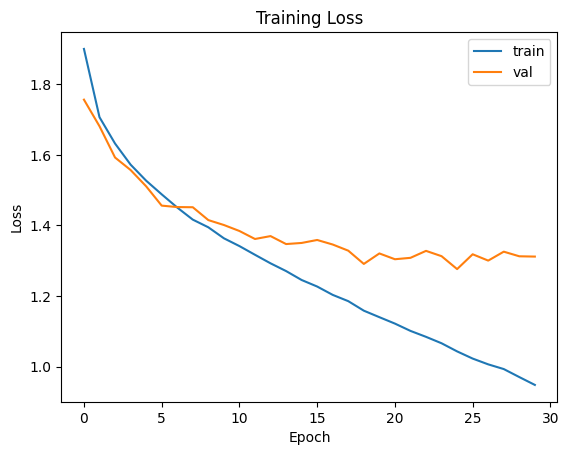

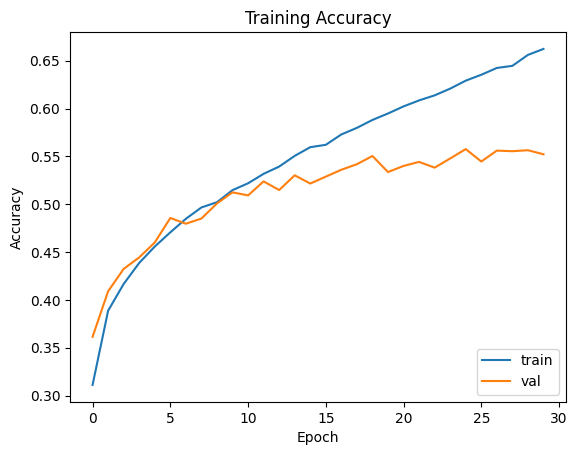

In [64]:
display_training_history(hist_mlp)

In [65]:
model.load_weights(mlp_weights_path)
score_mlp = model.evaluate(x_test, y_test, verbose=0)

## Test / Evaluate

In [66]:
y_pred = model.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 2ms/step


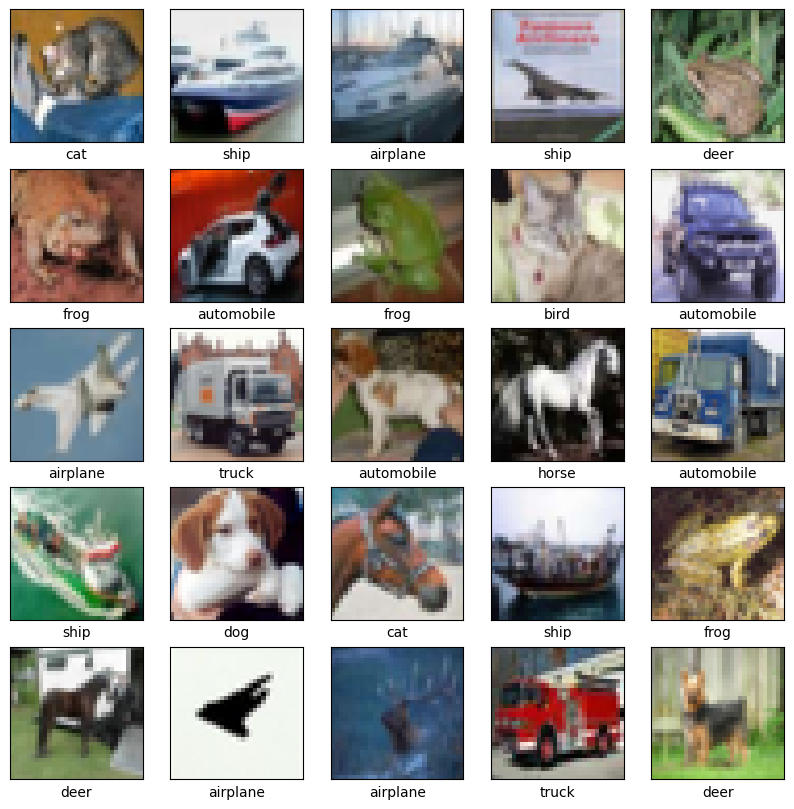

In [67]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(x_test)

y_classes = [np.argmax(element) for element in y_pred]
plt.figure(figsize=(10,10))
for i in range(25):
     plt.subplot(5,5,i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(x_test[i])
     plt.xlabel(labels[y_classes[i]])
plt.show()

In [68]:
y_test_classes = np.argmax(y_test, axis=1)

In [69]:
print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.63      0.60      0.62      1000
           1       0.60      0.74      0.67      1000
           2       0.44      0.48      0.46      1000
           3       0.39      0.35      0.37      1000
           4       0.51      0.42      0.46      1000
           5       0.48      0.41      0.44      1000
           6       0.54      0.68      0.60      1000
           7       0.62      0.63      0.62      1000
           8       0.64      0.70      0.67      1000
           9       0.67      0.50      0.57      1000

    accuracy                           0.55     10000
   macro avg       0.55      0.55      0.55     10000
weighted avg       0.55      0.55      0.55     10000



In [70]:
def plot_confusion_matrix(cm, classes):
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color ="white" if cm[i,j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("Predicted label")


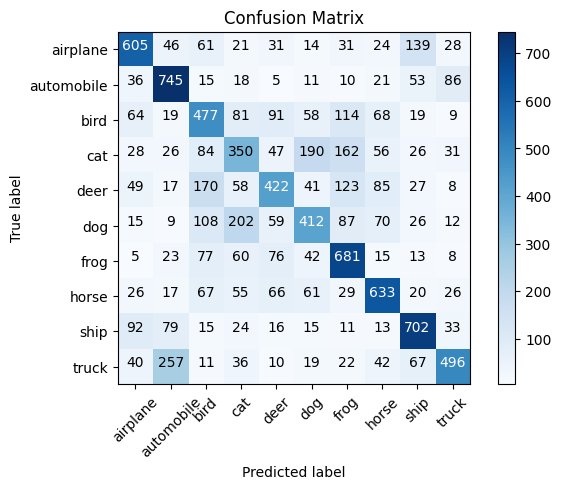

In [71]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_plot_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

# Convolutional Neural Networks

In [72]:
def create_cnn(shape):
    # Create model architecture
    model = Sequential([
        Conv2D(filters=16, kernel_size=2, padding="same", activation="relu", input_shape=shape),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=32, kernel_size=2, padding="same", activation="relu"),
        MaxPooling2D(pool_size=2),
        Conv2D(filters=64, kernel_size=2, padding="same", activation="relu"),
        MaxPooling2D(pool_size=2),
        Dropout(0.1),
        Flatten(),
        Dense(units=512, activation="relu"),
        Dropout(0.1),
        Dense(units=10, activation="softmax"),
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0001),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [73]:
cnn = create_cnn((32, 32, 3))

In [74]:
# Build cnn
print("CNN architecture:")
cnn.summary()

CNN architecture:
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 16)        208       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 16, 16, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 32)        2080      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 

In [75]:
cnn_weights_path = "saved_weights/cifar10_cnn.hdf5"

In [76]:
# Train the cnn
checkpointer_cnn = ModelCheckpoint(cnn_weights_path, verbose=1, save_best_only=True)
hist_cnn = cnn.fit(x_train, y_train, batch_size=64, epochs=30, validation_split=0.1, callbacks=[checkpointer_cnn])

Epoch 1/30
695/704 [============================>.] - ETA: 0s - loss: 1.9457 - accuracy: 0.3063
Epoch 1: val_loss improved from inf to 1.67797, saving model to saved_weights/cifar10_cnn.hdf5
704/704 [==============================] - 6s 7ms/step - loss: 1.9432 - accuracy: 0.3072 - val_loss: 1.6780 - val_accuracy: 0.4018
Epoch 2/30
 24/704 [>.............................] - ETA: 3s - loss: 1.7224 - accuracy: 0.3919

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


695/704 [============================>.] - ETA: 0s - loss: 1.6092 - accuracy: 0.4248
Epoch 2: val_loss improved from 1.67797 to 1.51709, saving model to saved_weights/cifar10_cnn.hdf5
704/704 [==============================] - 3s 5ms/step - loss: 1.6080 - accuracy: 0.4252 - val_loss: 1.5171 - val_accuracy: 0.4626
Epoch 3/30
695/704 [============================>.] - ETA: 0s - loss: 1.4904 - accuracy: 0.4688
Epoch 3: val_loss improved from 1.51709 to 1.42210, saving model to saved_weights/cifar10_cnn.hdf5
704/704 [==============================] - 4s 5ms/step - loss: 1.4896 - accuracy: 0.4693 - val_loss: 1.4221 - val_accuracy: 0.4906
Epoch 4/30
698/704 [============================>.] - ETA: 0s - loss: 1.4174 - accuracy: 0.4957
Epoch 4: val_loss improved from 1.42210 to 1.36770, saving model to saved_weights/cifar10_cnn.hdf5
704/704 [==============================] - 4s 6ms/step - loss: 1.4174 - accuracy: 0.4957 - val_loss: 1.3677 - val_accuracy: 0.5154
Epoch 5/30
698/704 [=============

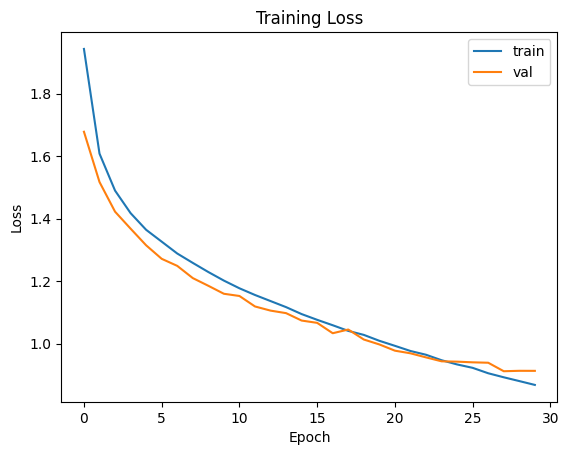

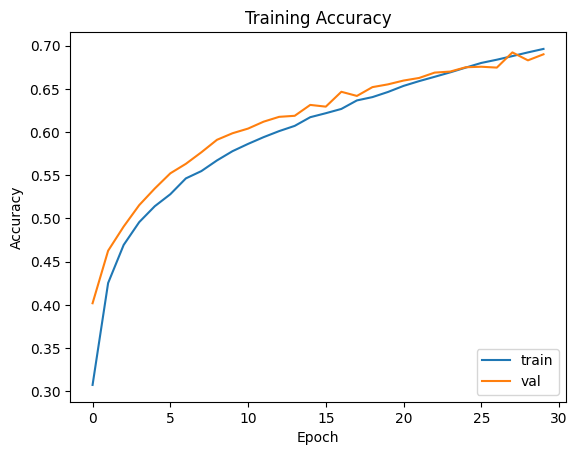

In [77]:
display_training_history(hist_cnn)

In [78]:
cnn.load_weights(cnn_weights_path)
score_cnn = cnn.evaluate(x_test, y_test, verbose=0)

## Test Evaluate

In [79]:
y_pred = cnn.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

313/313 [==============================] - 1s 2ms/step


313/313 [==============================] - 1s 2ms/step


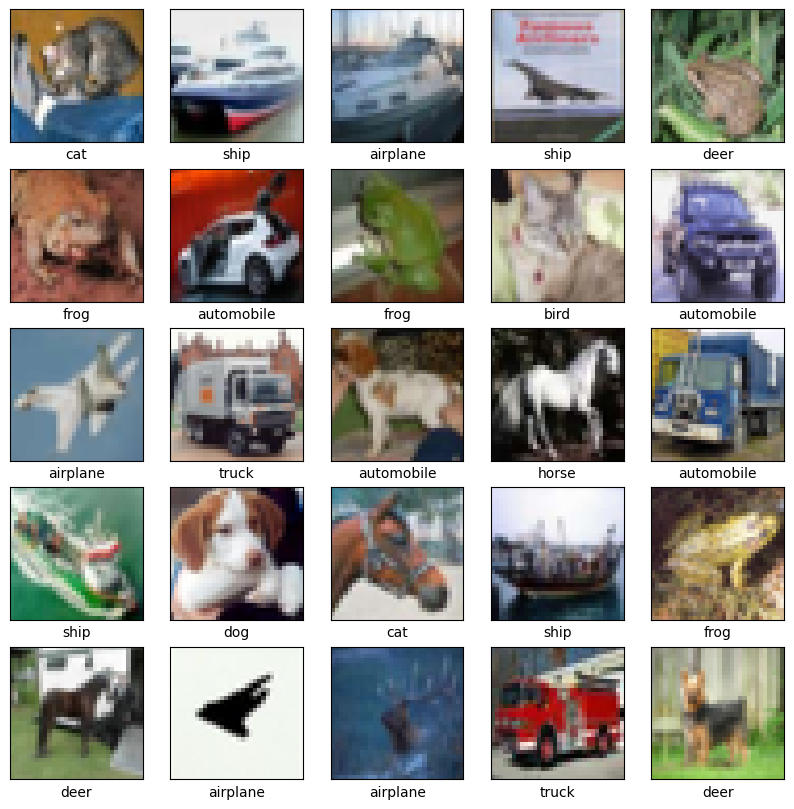

In [80]:
labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
y_pred = model.predict(x_test)

y_classes = [np.argmax(element) for element in y_pred]
plt.figure(figsize=(10,10))
for i in range(25):
     plt.subplot(5,5,i+1)
     plt.xticks([])
     plt.yticks([])
     plt.grid(False)
     plt.imshow(x_test[i])
     plt.xlabel(labels[y_classes[i]])
plt.show()

In [81]:
y_test_classes = np.argmax(y_test, axis=1)

In [82]:
print("Classification Report: \n", classification_report(y_test_classes, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.72      0.74      0.73      1000
           1       0.77      0.76      0.76      1000
           2       0.61      0.49      0.54      1000
           3       0.49      0.46      0.48      1000
           4       0.58      0.67      0.62      1000
           5       0.61      0.53      0.57      1000
           6       0.71      0.79      0.75      1000
           7       0.77      0.68      0.72      1000
           8       0.76      0.82      0.79      1000
           9       0.69      0.78      0.73      1000

    accuracy                           0.67     10000
   macro avg       0.67      0.67      0.67     10000
weighted avg       0.67      0.67      0.67     10000



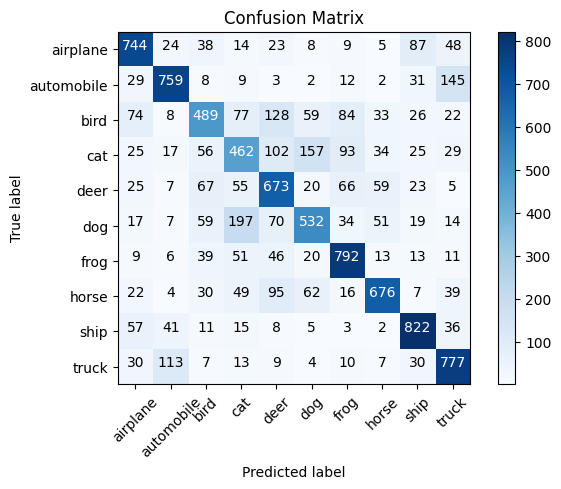

In [83]:
cm = confusion_matrix(y_test_classes, y_pred_classes)
cm_plot_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels)

# Compare

1. MLP

In [84]:
# Compare the scores
print("Loss mlp: ", score_mlp[0])
print("Accuracy mlp: {0:.2f}%".format(score_mlp[1] * 100))

Loss mlp:  1.2788220643997192
Accuracy mlp: 55.23%


2. CNN

In [85]:
print("Lost cnn: ", score_cnn[0])
print("Accuracy cnn: {0:.2f}%".format(score_cnn[1] * 100))

Lost cnn:  0.9416530132293701
Accuracy cnn: 67.26%


# Using Pre-trained

Since the CNN have a better accuracy we will use a pre-trained model.

## Model VGG16

In [86]:
from keras.applications.vgg16 import VGG16

In [87]:
# Load pre-trained VGG16 model
base_model = VGG16(include_top=False, weights='imagenet', input_shape=(32, 32, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [88]:
# Add custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.1)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.1)(x)

predictions = Dense(10, activation='softmax')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [89]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [90]:
print(model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [91]:
cnn_best_weights_path = "saved_weights/cifar10_cnn_best.hdf5"

In [92]:
# Train the cnn
checkpointer_cnn_best = ModelCheckpoint(cnn_best_weights_path, verbose=1, save_best_only=True)
hist_cnn = model.fit(x_train, y_train, batch_size=64, epochs=20, validation_split=0.1, callbacks=[checkpointer_cnn_best])

Epoch 1/20
704/704 [==============================] - ETA: 0s - loss: 0.9470 - accuracy: 0.6718
Epoch 1: val_loss improved from inf to 0.60215, saving model to saved_weights/cifar10_cnn_best.hdf5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


704/704 [==============================] - 34s 39ms/step - loss: 0.9470 - accuracy: 0.6718 - val_loss: 0.6022 - val_accuracy: 0.7906
Epoch 2/20
703/704 [============================>.] - ETA: 0s - loss: 0.5352 - accuracy: 0.8201
Epoch 2: val_loss improved from 0.60215 to 0.50899, saving model to saved_weights/cifar10_cnn_best.hdf5
704/704 [==============================] - 26s 37ms/step - loss: 0.5351 - accuracy: 0.8201 - val_loss: 0.5090 - val_accuracy: 0.8280
Epoch 3/20
703/704 [============================>.] - ETA: 0s - loss: 0.3859 - accuracy: 0.8707
Epoch 3: val_loss improved from 0.50899 to 0.46632, saving model to saved_weights/cifar10_cnn_best.hdf5
704/704 [==============================] - 26s 37ms/step - loss: 0.3859 - accuracy: 0.8707 - val_loss: 0.4663 - val_accuracy: 0.8468
Epoch 4/20
703/704 [============================>.] - ETA: 0s - loss: 0.2704 - accuracy: 0.9100
Epoch 4: val_loss did not improve from 0.46632
704/704 [==============================] - 26s 37ms/step -

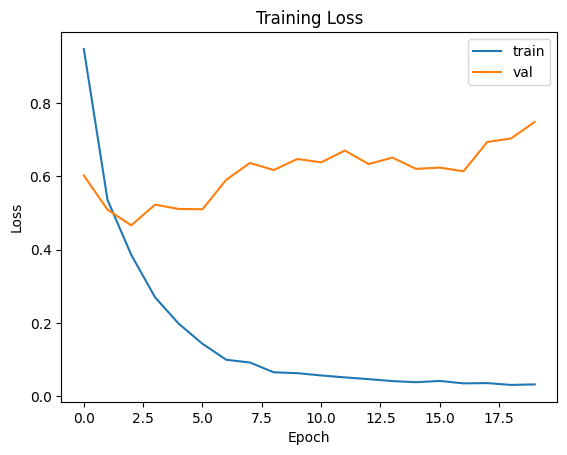

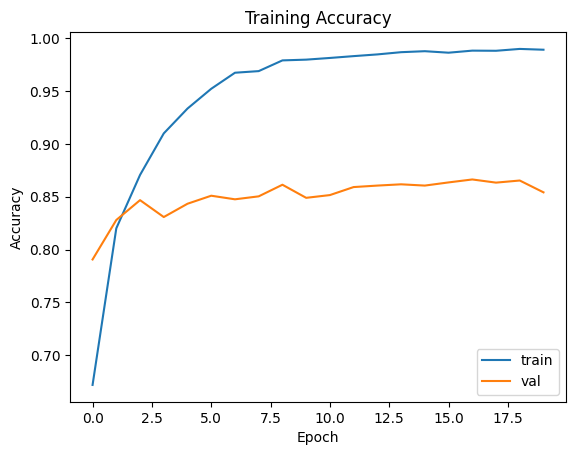

In [93]:
display_training_history(hist_cnn)

In [94]:
model.load_weights(cnn_best_weights_path)
score_cnn_best = model.evaluate(x_test, y_test, verbose=0)

In [95]:
print("Lost cnn: ", score_cnn_best[0])
print("Accuracy cnn: {0:.2f}%".format(score_cnn_best[1] * 100))

Lost cnn:  0.4904246926307678
Accuracy cnn: 83.44%
